In [1]:
%matplotlib inline
import GPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 
import matplotlib.mlab as mlab
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
from scipy.stats import uniform

In [2]:
#Reading csv files
features = ['SN112EK42.5', 'SN112EK47.5', 'SN112EK52.5', 'SN112EK57.5', 'SN112EK62.5', 'SN112EK67.5', 'SN112EK72.5', 'SN112EK77.5', 'SN112EK82.5', 'SN112EK87.5', 'SN124EK42.5', 'SN124EK47.5', 'SN124EK52.5', 'SN124EK57.5', 'SN124EK62.5', 'SN124EK67.5', 'SN124EK72.5', 'SN124EK77.5', 'SN124EK82.5', 'SN124EK87.5', 'DREK12.5', 'DREK17.5', 'DREK22.5', 'DREK27.5', 'DREK32.5', 'DREK37.5', 'DREK42.5', 'DREK47.5', 'DREK52.5', 'DREK60.0', 'DREK70.0', 'DREK80.0', 'DREK87.5']
inputs = ['S0', 'L', 'ms', 'mv']
error_features = ['SN112EK42.5_Error', 'SN112EK47.5_Error', 'SN112EK52.5_Error', 'SN112EK57.5_Error', 'SN112EK62.5_Error', 'SN112EK67.5_Error', 'SN112EK72.5_Error', 'SN112EK77.5_Error', 'SN112EK82.5_Error', 'SN112EK87.5_Error', 'SN124EK42.5_Error', 'SN124EK47.5_Error', 'SN124EK52.5_Error', 'SN124EK57.5_Error', 'SN124EK62.5_Error', 'SN124EK67.5_Error', 'SN124EK72.5_Error', 'SN124EK77.5_Error', 'SN124EK82.5_Error', 'SN124EK87.5_Error', 'DREK12.5_Error', 'DREK17.5_Error', 'DREK22.5_Error', 'DREK27.5_Error', 'DREK32.5_Error', 'DREK37.5_Error', 'DREK42.5_Error', 'DREK47.5_Error', 'DREK52.5_Error', 'DREK60.0_Error', 'DREK70.0_Error', 'DREK80.0_Error', 'DREK87.5_Error'
]
df = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=features) #imqmd model data
df2 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_bugfix_model_new_mv.csv", usecols=inputs) #imqmd model data
df3 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_exp_result.csv", usecols=features) #experiment data
df4 = pd.read_csv("C:/Users/danny/OneDrive/Desktop/bayesian_example/e120_exp_result.csv", usecols=error_features) #experiment data

In [3]:
#obtaining the output from the imqmd csv file
y = df.loc[:, features].values
pd.DataFrame(data = y, columns = features).head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.049740,1.009370,0.971587,0.933543,0.895236,0.860123,0.828202,0.797841,0.769038,0.742806,...,1.25778,1.28492,1.31206,1.33919,1.36544,1.39081,1.42918,1.47076,1.50127,1.51709
1,1.101460,1.076550,1.053560,1.032650,1.013830,0.995491,0.977648,0.959740,0.941767,0.928342,...,1.23401,1.26444,1.29513,1.32608,1.36158,1.40161,1.45320,1.51812,1.59659,1.65511
2,1.033870,0.999617,0.967117,0.937034,0.909368,0.884840,0.863449,0.842654,0.822455,0.805631,...,1.25178,1.27908,1.30598,1.33249,1.36163,1.39341,1.43365,1.48005,1.51807,1.54192
3,0.979704,0.948603,0.921646,0.900123,0.884032,0.867298,0.849921,0.837539,0.830154,0.821927,...,1.23993,1.26528,1.29176,1.31937,1.34603,1.37173,1.40500,1.44910,1.48531,1.50366
4,1.026250,0.998031,0.974097,0.951106,0.929057,0.908939,0.890750,0.876159,0.865163,0.855486,...,1.21375,1.23669,1.26262,1.29155,1.32245,1.35531,1.40611,1.47931,1.54623,1.59240


In [4]:
#applying scikitlearns' PCA on the outputs and reducing it from 33 features to 3
#The data is not standardized before the applying PCA
pca = PCA(n_components=3)
yPCA = pca.fit_transform(y)
PCADf = pd.DataFrame(data = yPCA, columns = ['PCA 1', 'PCA 2', 'PCA 3'])
PCADf.head()

,PCA 1,PCA 2,PCA 3
0,0.004585,0.189818,-0.017025
1,-0.889633,0.023971,0.013887
2,-0.174100,0.061279,-0.026724
3,-0.011284,-0.096832,-0.013462
4,-0.320008,-0.111562,0.062695


In [5]:
#Seeing how much each PCA takes into account the overall data
print(pca.explained_variance_ratio_)

[0.95664316 0.03929512 0.00237127]


In [6]:
#Checking if the reverse PCA works
G = np.dot(yPCA, pca.components_) + pca.mean_
print(G)

[[1.05226638 1.00984326 0.96921742 ... 1.46182261 1.48709511 1.50213919]
 [1.10304362 1.0782522  1.05524568 ... 1.52386133 1.59330332 1.64266425]
 [1.03278436 0.99840936 0.96670162 ... 1.47629668 1.51377543 1.53713317]
 ...
 [0.95791579 0.90589328 0.85745636 ... 1.38459667 1.38846038 1.38896563]
 [1.01619208 0.95436387 0.89447893 ... 1.3714765  1.37153888 1.37266782]
 [0.99489351 0.96558251 0.94040069 ... 1.45655175 1.51113185 1.55003265]]


In [7]:
#obtaining the inputs from the Imqmd model cvs file
x = df2.loc[:, inputs].values
xdf = pd.DataFrame(data = x, columns = ['S0', 'L', 'ms', 'mv'])
xdf.head()

,S0,L,ms,mv
0,31.159,43.5,0.980,0.865000
1,35.073,56.1,0.700,0.875000
2,32.395,66.9,0.860,0.855000
3,28.275,86.7,0.972,1.095001
4,27.657,79.5,0.612,0.975000


In [8]:
#with scikitlearn, I use a squared exponential for the kernal and a regression model for the gaussian process
kernel = RBF() 
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(x, yPCA)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=RBF(length_scale=1), n_restarts_optimizer=10,
                         normalize_y=False, optimizer='fmin_l_bfgs_b',
                         random_state=None)

In [9]:
#creating new uniformaly randomized inputs x_ similar to x(input data from imqmd)
msv_min = min(x[:,2].min(),x[:,3].min())
msv_max = max(x[:,2].max(),x[:,3].max())
sl_min = min(x[:,0].min(),x[:,1].min())
sl_max = max(x[:,0].max(),x[:,1].max())
x_sl = np.random.uniform(sl_min,sl_max,94)
x_msv = np.random.uniform(msv_min,msv_max,94)
x_sl = x_sl.reshape(47,2)
x_msv = x_msv.reshape(47,2)
x_ = np.concatenate((x_sl,x_msv),axis=1)
x_df = pd.DataFrame(data = x_, columns =  ['S0', 'L', 'ms', 'mv'])
x_df.head()

,S0,L,ms,mv
0,75.849685,118.154249,0.767894,0.621471
1,66.352394,110.594535,0.619531,0.717351
2,89.719024,58.389935,0.650143,1.061689
3,103.164510,44.604086,1.070589,0.880763
4,102.865432,38.847663,0.806598,0.827712


In [10]:
#using the gp model trained on the inputs(x) and the outputs(yPCA) 
#will be used on x_ to predict y_pred and y_cov
y_pred, y_cov= gp.predict(x_, return_cov=True) #should I inverse pca on y_cov?
y_preddf = pd.DataFrame(data = y_pred, columns =  ['PCA 1', 'PCA 2', 'PCA 3'])
y_preddf.head()

,PCA 1,PCA 2,PCA 3
0,3.477568e-29,1.647620e-29,1.624122e-30
1,3.778310e-17,2.414949e-17,1.642598e-18
2,-5.585176e-48,7.095867e-51,-1.046359e-48
3,-6.750102e-78,3.544860e-79,-2.024845e-78
4,-3.323381e-79,2.375637e-78,3.906599e-79


In [11]:
#Applying reverse PCA on y_pred to look look like the orginal data set with 33 features
Y = np.dot(y_pred, pca.components_) + pca.mean_
Ydf= pd.DataFrame(data = Y, columns =  features)
Ydf.head()

,SN112EK42.5,SN112EK47.5,SN112EK52.5,SN112EK57.5,SN112EK62.5,SN112EK67.5,SN112EK72.5,SN112EK77.5,SN112EK82.5,SN112EK87.5,...,DREK27.5,DREK32.5,DREK37.5,DREK42.5,DREK47.5,DREK52.5,DREK60.0,DREK70.0,DREK80.0,DREK87.5
0,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
1,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
2,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
3,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706
4,1.007239,0.972153,0.940416,0.911383,0.885053,0.860981,0.839165,0.819277,0.801317,0.784839,...,1.241723,1.267337,1.293529,1.320298,1.346925,1.373411,1.410665,1.455663,1.494245,1.519706


 C:\Users\danny\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning:Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


Text(0, 0.5, '$R_{n/p}$ & $DR_{n/p}$')

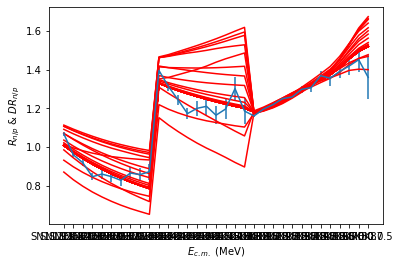

In [12]:
#plotting y_predict vs energy E_c.m. (for example the column SN112EK42.5 represent energy 42.5) 
#also plotting experimental data and its error bars
Yy = np.array([Y[:,0],Y[:,1],Y[:,2],Y[:,3],Y[:,4],Y[:,5],Y[:,6],Y[:,7],Y[:,8],Y[:,9],Y[:,10],Y[:,11],Y[:,12],Y[:,13],Y[:,14],Y[:,15],Y[:,16],Y[:,17],Y[:,18],Y[:,19],Y[:,20],Y[:,21],Y[:,22],Y[:,23],Y[:,24],Y[:,25],Y[:,26],Y[:,27],Y[:,28],Y[:,29],Y[:,30],Y[:,31],Y[:,32]])
y_ex_std =df4.loc[:,error_features].values #experiment data
y_ex_std = y_ex_std.reshape(33,1)
Y_ex = df3.loc[:, features].values #experiment error
Y_ex = Y_ex.reshape(33,1)

#plotting the data
plt.plot(features,Yy, 'r')
plt.errorbar(features,Y_ex, yerr = y_ex_std)
plt.xlabel('$E_{c.m.}$ (MeV)')
plt.ylabel('$R_{n/p}$ & $DR_{n/p}$')

#currently working on using the cov matrix to add error to the data and using fill_between to get a band.

(47, 47)


(array([ 8., 36.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.13151641, 0.79147674, 1.45143707, 2.11139741, 2.77135774,
        3.43131807, 4.0912784 , 4.75123874, 5.41119907, 6.0711594 ,
        6.73111973]),
 <a list of 10 Patch objects>)

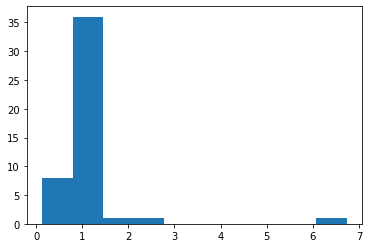

In [13]:
#creating the likelihood function
Y_exp = df3.loc[:, features].values #data from the experiment
y_exp_std =df4.loc[:,error_features].values #error from the experiment
cov = pca.get_covariance() #cov = pca.components_.T*S**2*pca.components_ + pca.noise_variance_*eye(pca.n_features)
covM = cov - y_exp_std*np.eye(33) #subtracting the diagonal of the cov matrix by the experimental error
print(y_cov.shape)
Z = Y-Y_exp
H = np.dot(Z,covM) #matmul?
J = np.dot(H,Z.T) #J = (Y-Y_exp)*covM*(Y-Y_exp).T
like = np.exp(-sum(J))
plt.hist(like,10)

#currently I'm using the covariant matrix I got from pca.get_covariance
#So what I'm tring to work on here is using the cov matrix y_cov that the gaussian process predicted
#the problem is that I don't know how to apply reverse pca on the cov matrix y_cov.

In [14]:
#Finding the posterior using MCMC with a metropolis hastings algorithm

#Setting up MCMC 
MC_trails = 100000 #number of iterations
met_accept = 0  #acceptance tracker
met_warmup = MC_trails/10 #numbers of runs burned
met_step = 6 #how big a step we take
#I will be adding a met_step2 so what S0 and L take different size steps the ms and mv

#set some empty arrays to store values in
S0 = np.zeros(MC_trails)
L = np.zeros(MC_trails)
ms = np.zeros(MC_trails)
mv = np.zeros(MC_trails)

#setting up some uniform distributions
uni1 = np.random.uniform(0,1, MC_trails)
uni2 = np.random.uniform(0,1,MC_trails)

#picking a random value from the likelihood function
lik = np.random.choice(like)

#Setting up priors and picking a random starting point at i =0
S0[0] = np.random.uniform(25.7,36,1)
L[0] = np.random.uniform(32,120,1)
msss = np.linspace(0.6,1,1)
ms[0] = norm.pdf(msss,0.7,0.05) #gaussian with value 0.7, and width 0.05
mv[0] = np.random.uniform(0.6,1.2,1)

#starting the metropolis algorathim
for i in range(MC_trails-1):
    S0_c = S0[i]
    L_c = L[i]
    ms_c = ms[i]
    mv_c = mv[i]
    
    #applying the random walk
    if uni1[i] > 0.5:
        S0_p = S0_c + met_step*np.random.normal()
        L_p = L_c + met_step*np.random.normal()
        ms_p = ms_c + met_step*np.random.normal()
        mv_p = mv_c + met_step*np.random.normal()
    else:
        S0_p = max(0,S0_c - met_step*np.random.normal())
        L_p = max(0, L_c - met_step*np.random.normal())
        ms_p = max(0, ms_c - met_step*np.random.normal())
        mv_p = max(0, mv_c - met_step*np.random.normal())
        
    #creating the metropolis ratio
    met_r = (lik*S0_p*L_p*ms_p*mv_p)/(lik*S0_c*L_c*ms_c*mv_c)
    if uni2[i] < min(1,met_r):
        S0[i+1] = S0_p
        L[i+1] = L_p
        ms[i+1] = ms_p
        mv[i+1]= mv_p
        met_accept = met_accept +1
    else:
        S0[i+1] = S0_c
        L[i+1] = L_c
        ms[i+1] = ms_c
        mv[i+1]= mv_c

#acceptance rate        
MET = met_accept/(MC_trails-met_warmup)

print(MET)    

#Currenlty I'm working making the MCMC better, and understanding how to find the posterior.

1.1013444444444445


(array([7.0000e+00, 9.0000e+00, 7.0000e+00, 1.3000e+01, 1.1000e+01,
        1.4000e+01, 7.0000e+00, 1.4000e+01, 1.5000e+01, 1.5000e+01,
        1.9000e+01, 2.3000e+01, 2.3000e+01, 2.0000e+01, 3.7000e+01,
        3.8000e+01, 5.4000e+01, 5.4000e+01, 6.2000e+01, 7.1000e+01,
        6.7000e+01, 6.3000e+01, 7.8000e+01, 7.0000e+01, 9.4000e+01,
        1.2700e+02, 1.2200e+02, 1.5100e+02, 1.7800e+02, 1.7400e+02,
        1.8600e+02, 2.3400e+02, 2.9600e+02, 3.6500e+02, 4.1700e+02,
        4.4900e+02, 6.4500e+02, 9.3200e+02, 1.0050e+03, 1.3780e+03,
        1.7680e+03, 2.1190e+03, 2.0530e+03, 3.0490e+03, 4.3570e+03,
        5.5230e+03, 9.0110e+03, 1.7557e+04, 2.4423e+04, 1.5251e+04,
        1.4750e+03, 1.0730e+03, 1.2930e+03, 8.6200e+02, 6.0200e+02,
        3.9400e+02, 2.8300e+02, 2.4900e+02, 2.1900e+02, 1.8400e+02,
        1.4400e+02, 7.8000e+01, 5.9000e+01, 1.9000e+01, 8.0000e+00,
        6.0000e+00, 9.0000e+00, 9.0000e+00, 5.0000e+00, 4.0000e+00,
        1.3000e+01, 1.2000e+01, 1.2000e+01, 1.00

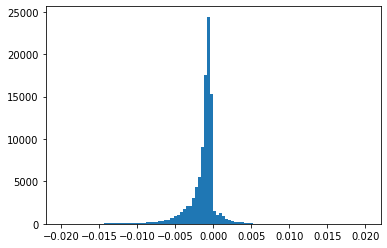

In [16]:
#attempt at creating figure 3 in the paper.
fI= 1/ms - 1/mv
plt.hist(fI, 100,range=(-0.02,0.02))